In [1]:
# 確率過程とは？
# 確率変数Xtが与えられた時に、X=(Xt):t>=0を確率過程という
# 要するに時間などの条件によって変化する確率変数の数理モデルのこと
# X=(Xt):t>=0の実現値の集合について、実現するtの関数をXの「パス」という

In [2]:
# 独立定常増分とは？
# 以下の1,2の性質のこと
# 1 任意の0 = t0 < t1 < t2 <...< tに対して、Xt0, Xt1-Xt0, Xtn-Xtn-1が互いに独立である(独立増分性) 
# 2 任意の0 <= t <= t+hに対して、Xt+h-Xtの分布は、Xh-X0の分布と同一である(定常増分性)
# 以下でいくつか例を取り上げる

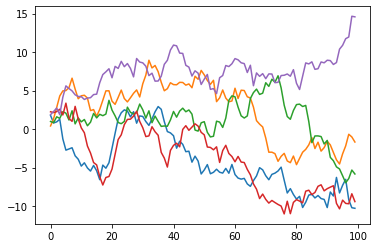

In [6]:
# ブラウン運動とは？
# 独立定常増であり、各t>=0に対してN(u*t, σ^2*t)に従い、パスが連続である確率過程のこと
# u=0, σ^2=1となるものを「標準ブラウン運動」or 「ウィナー過程」という

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

myu, sigma = 0, 1.0 # 標準ブラウン運動
x = np.arange(0,100,1)
y = np.zeros([x.shape[0],5])

y[0,:] = stats.norm.rvs(size=5)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.norm.rvs(myu, sigma, size=5)

for i in range(y.shape[1]):
    plt.plot(x,y[:,i])

plt.show() # 確率変数列の和(ランダムウォーク)を表示

In [9]:
# ブラウン運動のパラメータ推定
# 観測の時間間隔Δの観測データからuとσ^2を推定する

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

myu, sigma = 0, 1.0 # 推定したいパラメータ
x = np.arange(0,100,1)
y = np.zeros([x.shape[0],5])

# 観測データを生成
y[0,:] = stats.norm.rvs(size=5)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.norm.rvs(myu,sigma,size=5)

# パラメータを推定(ブラウン運動が正規分布に従うことを利用)
diff = y
diff[1:diff.shape[0],:] = diff[1:diff.shape[0],:] - diff[0:(diff.shape[0]-1),:]
mu_estimate = np.mean(diff, axis=0) # BkΔ-BkΔ-1の平均
sigma2_estimate = np.mean(diff**2, axis=0) - mu_estimate**2 # 2乗の平均ー平均の2乗(分散の公式)

# 最尤推定量
print("myu: {}".format(mu_estimate))
print("sigma^2: {}".format(sigma2_estimate))

myu: [-0.10295661 -0.0168736  -0.05841267 -0.09427399  0.14574467]
sigma^2: [1.01713631 0.91514001 1.00204315 1.06991421 0.9361394 ]


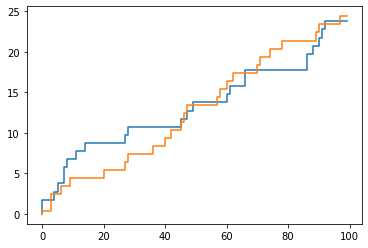

In [27]:
# ポアソン過程とは？
# 独立定常増であり、各t>=0に対して強度λtのポアソン分布に従う確率過程のこと

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

lamb = 0.3
path_num = 2
x = np.arange(0,100,1) # 経過時間
y = np.zeros([x.shape[0],path_num]) # イベント発生回数

y[0,:] = stats.norm.rvs(size=path_num)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.poisson.rvs(lamb,size=path_num)

x_ = np.repeat(x,2)
y_ = np.zeros([200,path_num])
for i in range(1,200):
    y_[i,:] = y[(i-1)//2,:]

for i in range(y.shape[1]):
    plt.plot(x_,y_[:,i])

plt.show() # 階段型のパスになる

In [28]:
# ポアソン過程のパラメータ推定
# 観測の時間間隔Δの観測データからλを推定する

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

lamb = 0.3 # 推測したいパラメータ
x = np.arange(0,100,1)
y = np.zeros([x.shape[0],3])

# 観測データを生成
y[0,:] = stats.norm.rvs(size=3)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.poisson.rvs(lamb,size=3)

diff = y
diff[1:diff.shape[0],:] = diff[1:diff.shape[0],:] - diff[0:(diff.shape[0]-1),:]

# イベントの総回数/観測時間で求める
lambda_estimate = np.mean(diff, axis=0)

# 最尤推定量
print("lambda: {}".format(lambda_estimate))

lambda: [0.33764052 0.21400157 0.22978738]
